# School of AI - São Paulo
## Aula - Séries Temporais
## Prof. Esp Victor Venites
## Data: 21/05/2019

# Treino Vs Teste
## Setup do Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# FiveThirtyEight -> Gráfico com várias séries ao mesmo tempo
# Função Mágica - Colocar comandos/resultados do MatPlot
from datetime import datetime
from pandas import Series # Cuida dos dados no estilo em série
import warnings
warnings.filterwarnings("ignore")
# df.idx[]
# df.iloc[]
# df.loc[]

## DataPrep

In [2]:
Base_BitCoin = pd.read_csv("BitCoin_USD_2012.01.01_to_2019.03.13.csv")
Base_BitCoin.head(3)
# Dados puros do Kaggle

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Apagar os NaN
Base_BitCoin.fillna(method="ffill", inplace=True) # Obrigado Raphael
# Dica Raphael -->> os parametros acima fazem o NaN ser substituido pelo ultimo valor não-NaN
# Extra que achei = .notna()
Base_BitCoin.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [4]:
# Apagar coluna do TimeStamp
Base_BitCoin.index = pd.to_datetime(Base_BitCoin["Timestamp"].astype(int), unit='s')
Base_BitCoin.drop('Timestamp', axis=1, inplace=True)
Base_BitCoin.index.rename("DateTime" , inplace=True)
Base_BitCoin.to_excel("BitCoin_USD_2012.01.01_to_2019.03.13.xlsx")
Base_BitCoin.head(3)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
DateTime,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [5]:
Base_BitCoin[1585520:1585700]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
DateTime,,,,,,,
2015-01-05 09:12:00,276.80,276.80,276.80,276.80,0.100000,27.680000,276.800000
2015-01-09 21:05:00,272.45,305.00,272.45,291.10,175.837078,50502.066285,287.209426
2015-01-09 21:06:00,294.52,294.52,291.15,294.49,126.501816,37173.872182,293.860384
2015-01-09 21:07:00,294.49,298.92,294.49,298.91,317.465960,94205.755015,296.742854
2015-01-09 21:08:00,297.14,298.99,296.00,297.15,144.501721,42982.661491,297.454322
2015-01-09 21:09:00,297.15,298.99,297.15,298.84,116.731757,34745.009224,297.648301
2015-01-09 21:10:00,298.98,298.99,297.15,298.00,175.846797,52493.160932,298.516447
2015-01-09 21:11:00,298.00,298.01,297.15,298.00,102.182967,30413.148452,297.634227
2015-01-09 21:12:00,298.00,298.01,296.06,297.10,177.235395,52721.225617,297.464430


## Teste dos dados

No handles with labels found to put in legend.


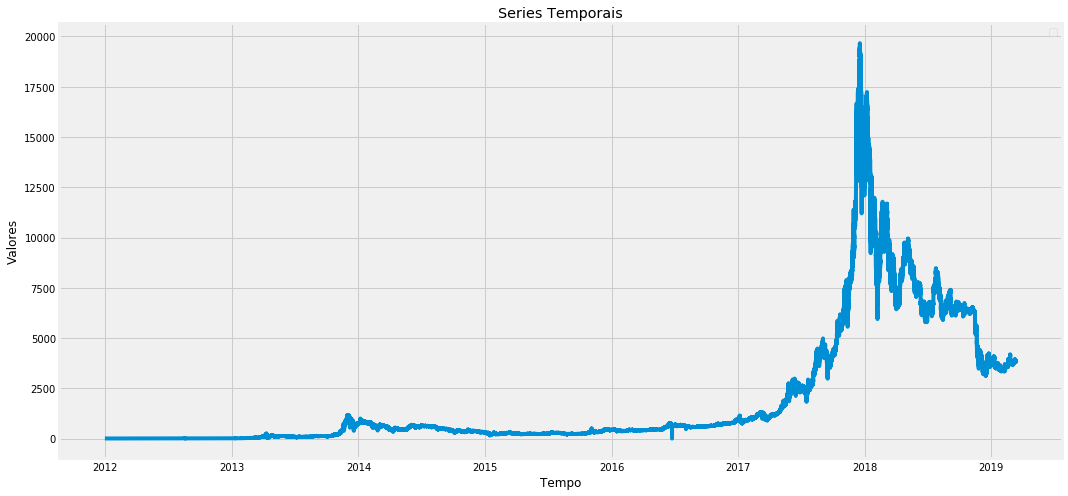

In [6]:
# Para ver os dados historicos
Bit_Coin_Original = pd.DataFrame(Base_BitCoin["Close"].copy())
# DateTime, Close
plt.figure(figsize = (16,8))
plt.title("Series Temporais")
plt.xlabel("Tempo")
plt.ylabel("Valores")
plt.legend(loc = 'best')
plt.plot(Bit_Coin_Original)

In [7]:
Bit_Coin = Bit_Coin_Original.loc['2013-01-01':].copy()
Bit_Coin

,Close
DateTime,
2013-01-01 00:00:00,13.24
2013-01-01 00:01:00,13.24
2013-01-01 00:02:00,13.24
2013-01-01 00:03:00,13.24
2013-01-01 00:04:00,13.24
2013-01-01 00:05:00,13.24
2013-01-01 00:06:00,13.24
2013-01-01 00:07:00,13.24
2013-01-01 00:08:00,13.24


In [8]:
# Serapar dados das Datas de Atuação - Para Ciclos
Bit_Coin.insert(loc=0, column="Ano", value=Bit_Coin.index.year)
Bit_Coin.insert(loc=1, column="Mes", value=Bit_Coin.index.month)
Bit_Coin.insert(loc=2, column="Dia_do_Mes", value=Bit_Coin.index.day)
## Dia do Ano - Li em um artigo de Mestrado
Bit_Coin.insert(loc=1, column="Dia_do_Ano", value=Bit_Coin.index.dayofyear)
## Semana
Bit_Coin.insert(loc=4, column="Semana_do_Ano", value=Bit_Coin.index.week)
Bit_Coin.insert(loc=5, column="Dia_da_Semana", value=Bit_Coin.index.dayofweek)
### The day of the week with Monday=0, Sunday=6.
Bit_Coin["Dia_da_Semana"] = Bit_Coin["Dia_da_Semana"] + 1
### Segunda = 1 até Domingo = 7
Bit_Coin.insert(loc=5, column="Hora_Dia", value=Bit_Coin.index.hour)
Bit_Coin.head(1)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2013-01-01,2013,1,1,1,1,0,2,13.24


## Análise Exploratória de Dados em Séries Temporais

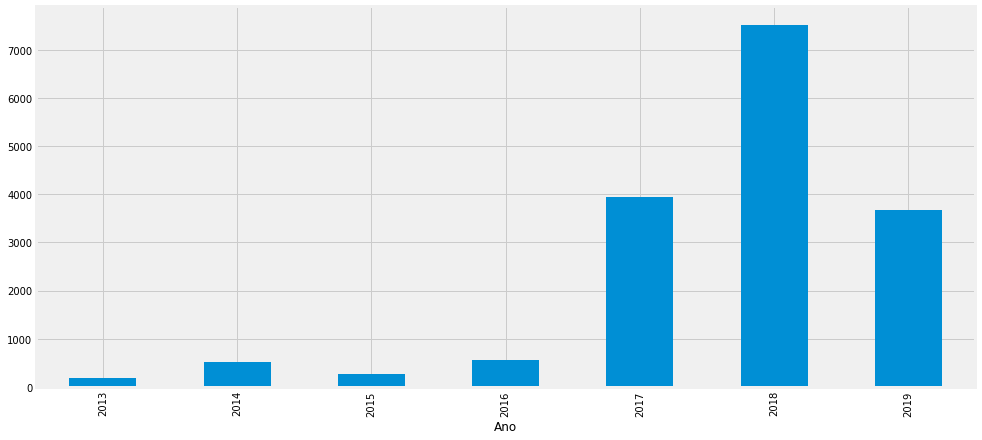

In [9]:
# Se eu quiser comprar por ano, para vender ano que vem? Vice-versa
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Ano')['Close'].mean().plot.bar()

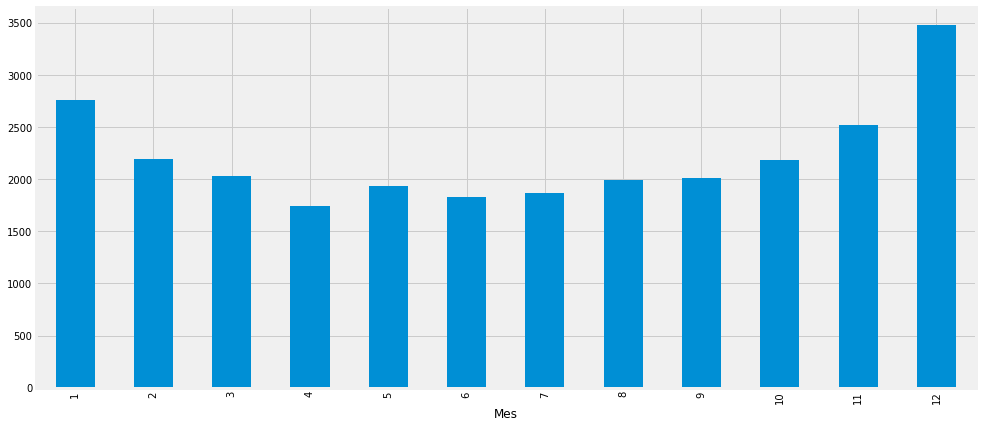

In [10]:
# Se eu quiser comprar por mes, para vender mes que vem? Vice-versa
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Mes')['Close'].mean().plot.bar()

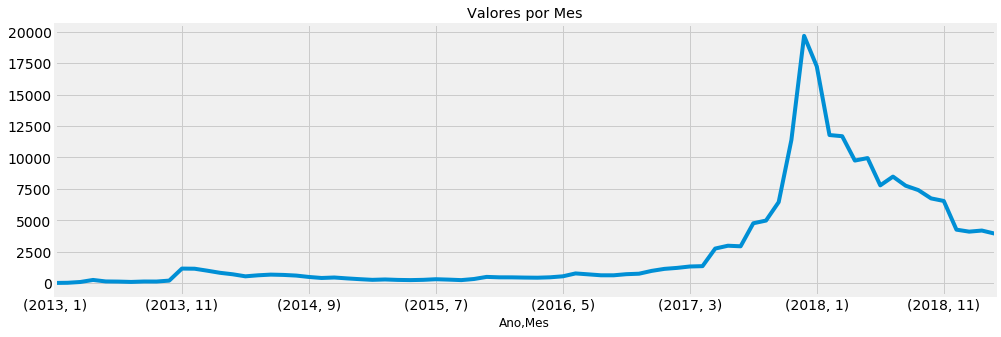

In [11]:
# Suavização Ingenua
Bit_Coin.groupby(['Ano', 'Mes'])['Close'].max().plot(figsize =(15,5), title = "Valores por Mes", fontsize = 14)

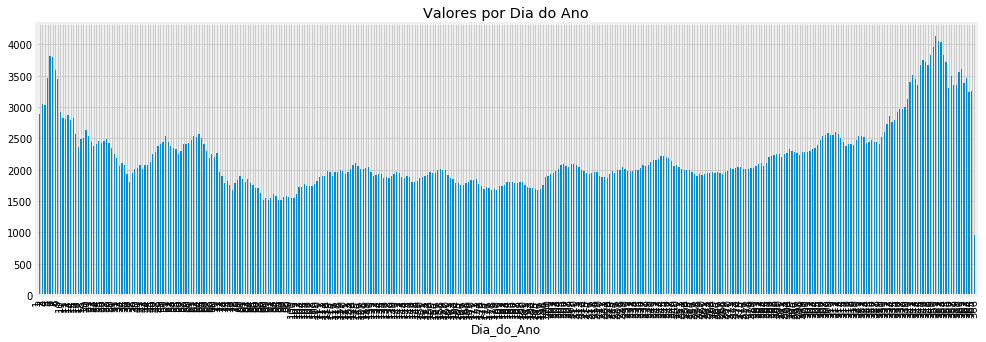

In [12]:
# Se eu quiser comprar por dia do ano, para vender em outro dia? Vice-versa
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Dia_do_Ano')['Close'].mean().plot.bar(figsize =(15,5), title = "Valores por Dia do Ano")

In [13]:
Bit_Coin.groupby('Dia_do_Ano')['Close'].max()

Dia_do_Ano
1      13941.49
2      15253.00
3      15437.65
4      15394.96
5      17090.03
6      17234.98
7      17148.09
8      16294.00
9      15366.58
10     14890.02
11     14955.00
12     14133.89
13     14546.87
14     14365.81
15     14369.98
16     13607.03
17     11752.09
18     12129.01
19     12050.00
20     13032.83
21     12766.19
22     11900.00
23     11371.29
24     11499.99
25     11736.40
26     11627.27
27     11630.00
28     11982.00
29     11805.00
30     11222.34
         ...   
337    11800.00
338    11613.07
339    11850.00
340    13695.71
341    16615.61
342    16666.66
343    15998.49
344    15385.00
345    17265.47
346    17410.99
347    17100.00
348    16830.45
349    17934.00
350    19377.00
351    19665.75
352    19215.86
353    19113.32
354    17920.34
355    17281.17
356    15783.00
357    15755.00
358    14600.00
359    14600.00
360    16120.00
361    16480.52
362    15455.00
363    15100.00
364    14390.79
365    14230.54
366      966.36
Name: Close, 

Text(0.5, 1.0, 'Comparação: Ano')

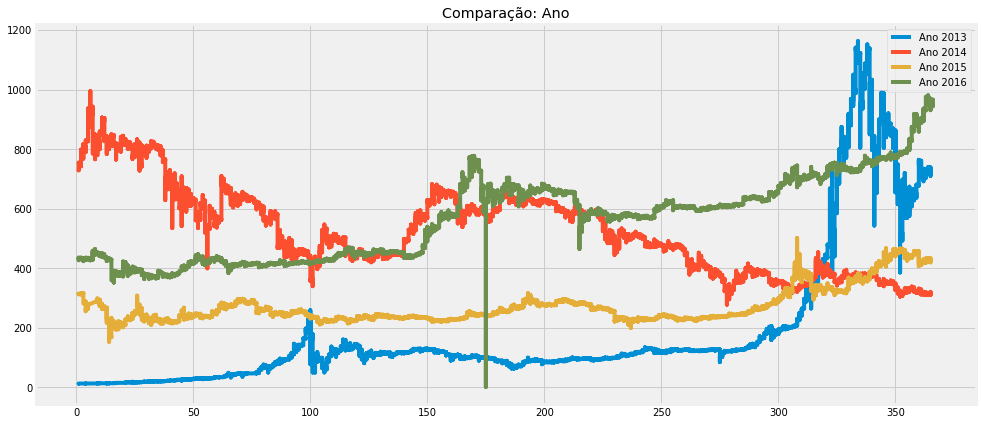

In [14]:
# Adaptar Chuva para BitCoin
# Vamos pensar
plt.figure(figsize = (15,7))
for i in Bit_Coin["Ano"].unique():
    if i < 2017:
        plt.plot(Bit_Coin[Bit_Coin["Ano"] == i]["Dia_do_Ano"]\
             , Bit_Coin[Bit_Coin["Ano"] == i]["Close"], label = 'Ano ' + str(i))
plt.legend(loc = 'best')
plt.title('Comparação: Ano' )

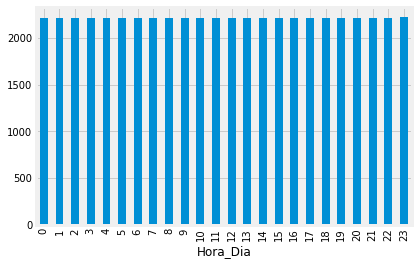

In [15]:
# Se eu quiser comprar hoje, para vender no mesmo dia? Vice-versa
Bit_Coin.groupby('Hora_Dia')['Close'].mean().plot.bar()

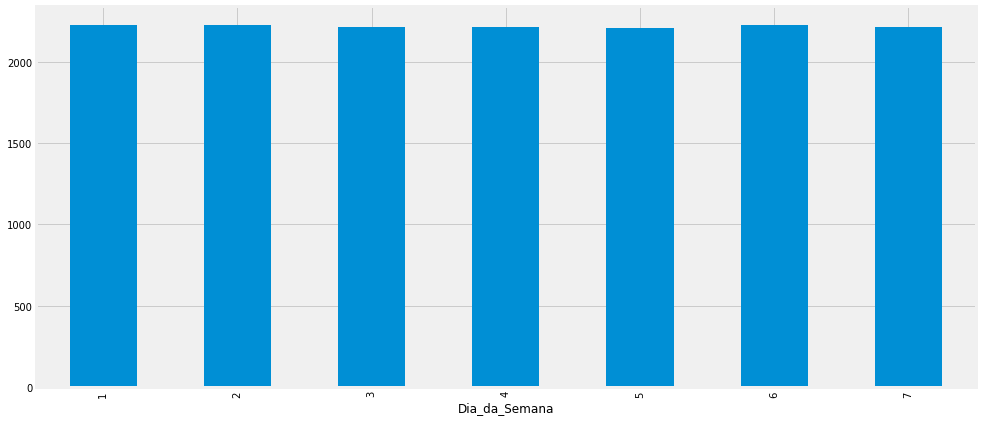

In [16]:
# Não consigo acompanhar isso todos dias da semana!
# Se eu quiser comprar por semana, para vender nesta semana? Vice-versa
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Dia_da_Semana') ['Close'].mean().plot.bar()
# Sexta e sábado teve valor maior

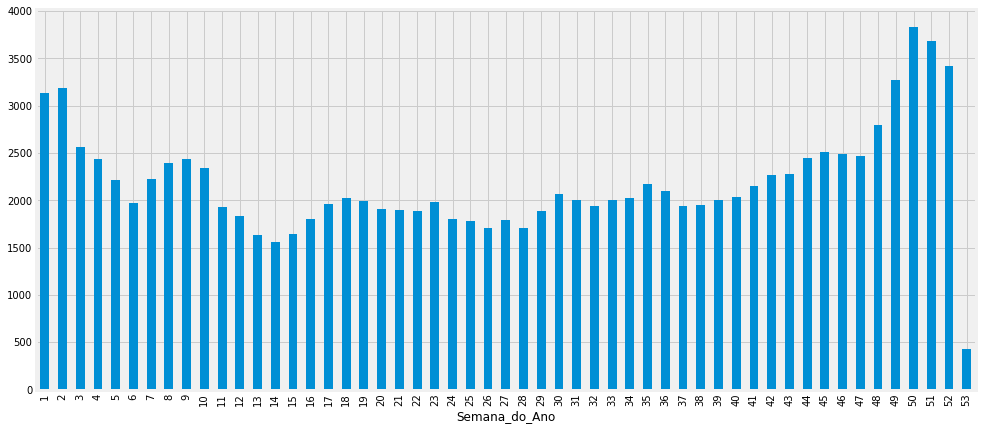

In [17]:
plt.figure(figsize = (15,7))
Bit_Coin.groupby('Semana_do_Ano') ['Close'].mean().plot.bar()

In [18]:
## Outra forma por # Resample -> ReAmostrar
#Hora
Hora = Bit_Coin.resample('H').mean()

#Diario
Diario = Bit_Coin.resample('D').mean()

#Semanal
Semanal = Bit_Coin.resample('W').mean()

#Mensal
Mensal = Bit_Coin.resample('M').mean()

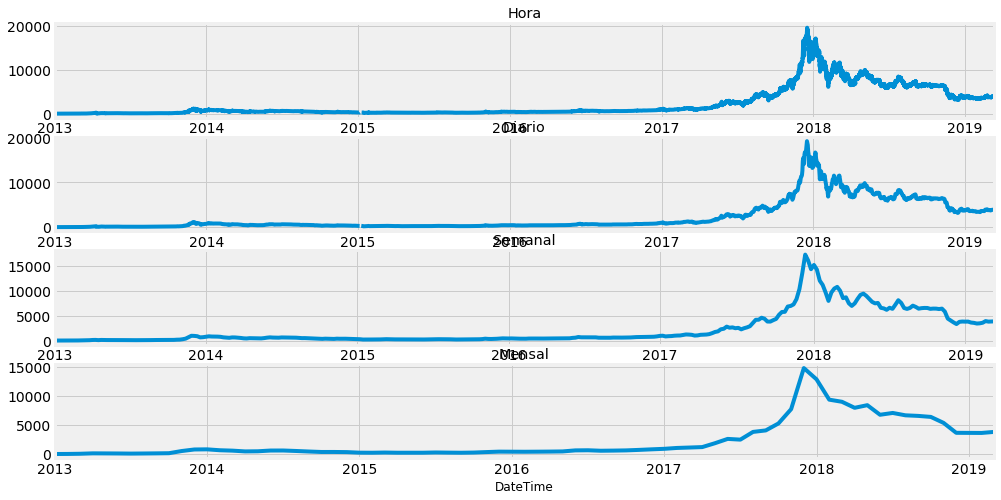

In [19]:
fig,axs = plt.subplots(4,1)
# Comparação temporal
Hora.Close.plot(figsize = (15,8), title = "Hora", fontsize = 14, ax = axs[0])
Diario.Close.plot(figsize = (15,8), title = "Diario", fontsize = 14, ax = axs[1])
Semanal.Close.plot(figsize = (15,8), title = "Semanal", fontsize = 14, ax = axs[2])
Mensal.Close.plot(figsize = (15,8), title = "Mensal", fontsize = 14, ax = axs[3])
# Não recomendo deixa o nome da coluna assim, dificulta produtizar depois
#Smothing

In [20]:
#Convertendo dados para média por dia
train = Bit_Coin.resample('D').mean()
# Garantir que não ocorra NaN na reamostragem
train.head(3)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2013-01-01,2013.0,1.0,1.0,1.0,1.0,11.5,2.0,13.179153
2013-01-02,2013.0,2.0,1.0,2.0,1.0,11.5,3.0,13.142528
2013-01-03,2013.0,3.0,1.0,3.0,1.0,11.5,4.0,13.150208


In [21]:
train.tail(3)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2019-03-11,2019.0,70.0,3.0,11.0,11.0,11.5,1.0,3864.612562
2019-03-12,2019.0,71.0,3.0,12.0,11.0,11.5,2.0,3847.294444
2019-03-13,2019.0,72.0,3.0,13.0,11.0,0.0,3.0,3861.950000


In [22]:
train[730:740]

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close
DateTime,,,,,,,,
2015-01-01,2015.0,1.0,1.0,1.0,1.0,11.500000,4.0,316.147812
2015-01-02,2015.0,2.0,1.0,2.0,1.0,11.500000,5.0,315.246299
2015-01-03,2015.0,3.0,1.0,3.0,1.0,11.500000,6.0,303.837847
2015-01-04,2015.0,4.0,1.0,4.0,1.0,11.500000,7.0,275.739514
2015-01-05,2015.0,5.0,1.0,5.0,2.0,4.117541,1.0,272.036763
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,2015.0,9.0,1.0,9.0,2.0,22.028571,5.0,291.912686


In [23]:
if (len(train) != train["Close"].count()):
    train.fillna(method="ffill", inplace=True)
    print("Resample resultou trechos com NaN, feita substiuicao pela ultimo valor registrado em ordem temporal.")
    print("Exemplo: DE[2.79, 3.15, NaN, 5.0, NaN, NaN, 1.56]")
    print(", PARA[2.79, 3.15, 3.15, 5.0, 5.0, 5.0, 1.56]")
train.to_excel("BitCoin_Index_Unique.xlsx")

Resample resultou trechos com NaN, feita substiuicao pela ultimo valor registrado em ordem temporal.
Exemplo: DE[2.79, 3.15, NaN, 5.0, NaN, NaN, 1.56]
, PARA[2.79, 3.15, 3.15, 5.0, 5.0, 5.0, 1.56]


## Iniciando Análises e Hipóteses
***Divide data into training and validation***

In [24]:
Train = train.ix['2013-01-01':'2017-12-31'].copy() # Treino
valid = train.ix['2018-01-01':'2018-12-31'].copy() # Validação
test = train.ix['2019-01-01':'2019-03-13'].copy() # Teste

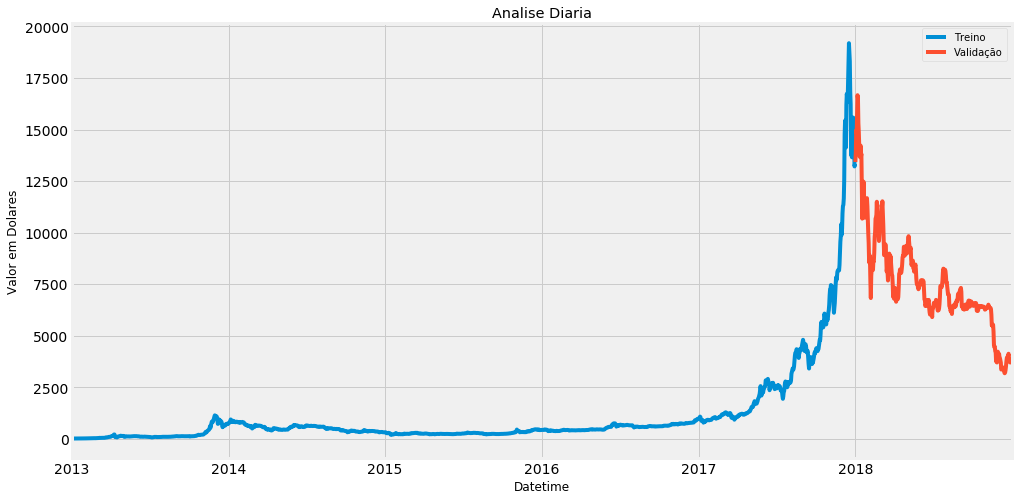

In [25]:
Train.Close.plot(figsize = (15,8), title = 'Analise Diaria', fontsize =14, label = 'Treino')
valid.Close.plot(figsize = (15,8), title = 'Analise Diaria', fontsize =14, label = 'Validação')
plt.xlabel('Datetime')
plt.ylabel('Valor em Dolares')
plt.legend(loc = 'best')
# Muita coisa?

# ** Naive Approach** - Aproximação Ingênua

Text(0.5, 1.0, 'Naive Forecast')

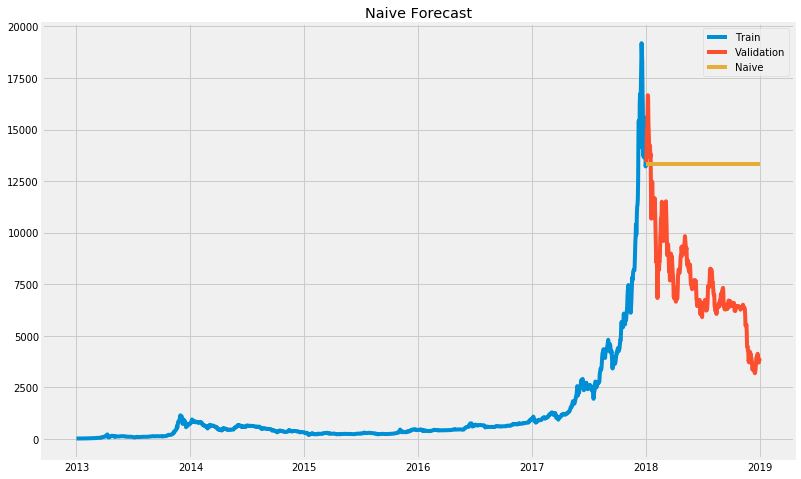

In [26]:
dd = np.asarray(Train['Close'])
y_hat = valid.copy()
y_hat['naive'] = dd[-1] # Considera o ultimo dado
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Close'],label = 'Train')
plt.plot(valid.index, valid['Close'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')
# Forecast = Previsao

## RMS - RootMeanSquare - Raiz Quadrada Média
*** Calculate RMS Error for Naive Approach***
> Média da Distância Euclidiana de todos os pontos

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Close, y_hat.naive)) # Obrigado Frederico de Portugal
rmse

6291.205167364263

## Média Móvel

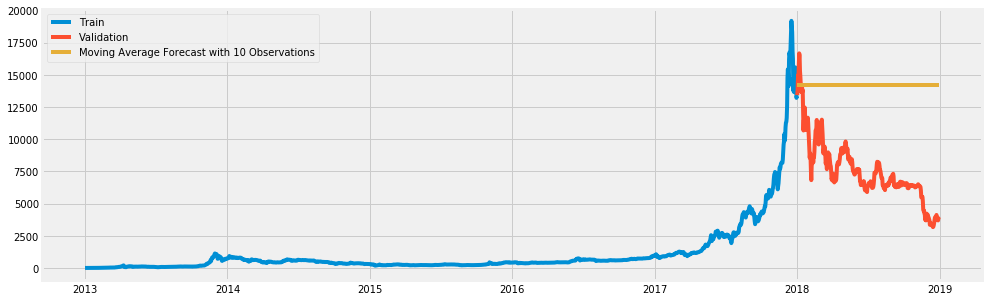

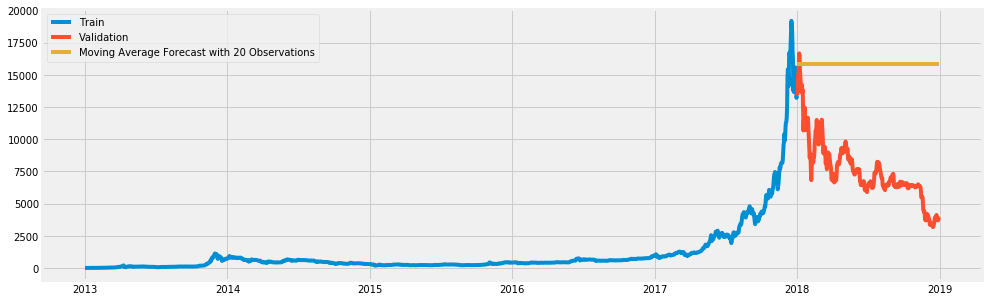

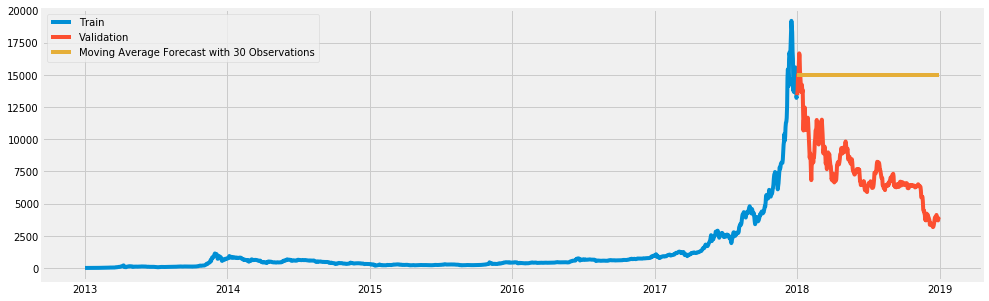

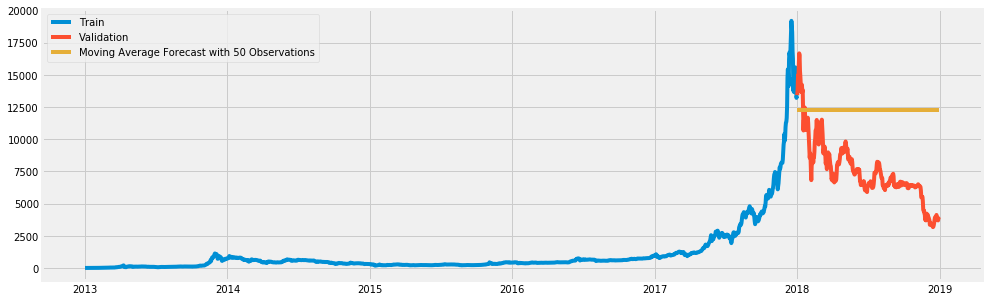

In [28]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(10).mean().iloc[-1]
# Pega os Últimos 10 para média móvel
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(30).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 30 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Close'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

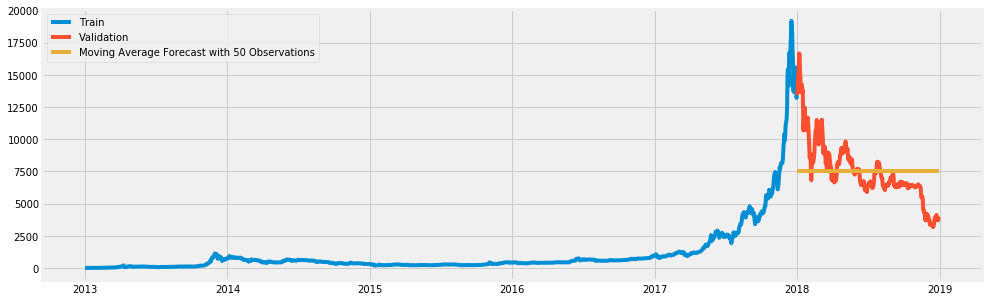

In [29]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Close'].rolling(141).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

In [30]:
rmse = sqrt(mean_squared_error(valid.Close, y_hat_avg['moving_average_forecast'])) # Obrigado Frederico de Portugal
rmse

2402.377249813593

***RMS Error for Moving Average***

In [31]:
# Mostra as distancias de erro para medias moveis de 10 em 10 até t-100
for i in range(1, len(Train), 1): # len = lenght - Tamanho
    y_hat_avg = valid.copy()
    y_hat_avg['moving_average_forecast'] = Train['Close'].rolling(i).mean().iloc[-1]
    rmse = sqrt(mean_squared_error(valid['Close'], y_hat_avg['moving_average_forecast']))
    print(rmse)

6291.205167364277
6232.859012943049
6622.055685898139
6751.061160514048
7078.780992684943
7245.240477719854
7192.155502234403
7115.8892619600965
7172.991196343636
7123.794425904378
7294.375526885032
7485.27033652782
7755.832874825494
8015.774832087732
8271.735135474546
8435.55705717284
8534.546844428056
8568.07438992269
8608.052861853772
8653.201982072456
8669.887358964184
8594.772337355173
8554.280830472915
8542.208196542808
8505.979121946919
8391.526130739254
8252.927686542793
8113.846974860097
7982.75810152302
7849.388460582669
7702.045242456505
7555.120800904847
7432.1603497752585
7300.790463272268
7169.75351121601
7031.01612932518
6886.339422702948
6743.251788435626
6608.089629898031
6480.520464404359
6358.703842491954
6241.560968259506
6124.571341439588
6010.591087640035
5904.699076985707
5796.489858220767
5685.300873574008
5570.620667258578
5456.664986428328
5343.644401524686
5243.321511674792
5154.230708577829
5073.605241392584
4998.623149617331
4922.184344614235
4850.768257992

5014.390159089891
5018.958626246713
5023.515423541548
5028.051500974005
5032.561415176923
5037.058755346606
5041.531776835939
5045.98260018504
5050.420333170438
5054.8429763191
5059.2553302737815
5063.657063059125
5068.041842046649
5072.409281887238
5076.763477642879
5081.107672292242
5085.424266933367
5089.704209267152
5093.96758426672
5098.204759937052
5102.430359993247
5106.647328440505
5110.842808183785
5115.020625449529
5119.2120854692685
5123.393012616021
5127.559147832919
5131.746913791588
5135.846866345124
5139.883680129901
5143.879752172868
5147.827508685186
5151.760892739638
5155.680666921957
5159.5884768535825
5163.484685658329
5167.358744732807
5171.21921098787
5175.071099417147
5178.898998230845
5182.705782355366
5186.4886857116635
5190.2550755429775
5193.999248861671
5197.742452586988
5201.482682909445
5205.209789647718
5208.9327914419855
5212.6351932705375
5216.333305177196
5220.0316407564105
5223.721744902152
5227.392550961829
5231.055490856671
5234.713179941483
5238.30

6242.253343129487
6243.701636254637
6245.145638827587
6246.589749267267
6248.037659089743
6249.482123184978
6250.92754264305
6252.371765561005
6253.804497543449
6255.231312836517
6256.652608838289
6258.070288662819
6259.49353657756
6260.916152516722
6262.335572483304
6263.7537866065795
6265.168022230699
6266.577302027337
6267.989570204765
6269.399767110336
6270.795008786172
6272.183699944822
6273.570022928321
6274.9518939684285
6276.325767076586
6277.692152666329
6279.05085291325
6280.403378706548
6281.756018989968
6283.108057469388
6284.456599598627
6285.807489010323
6287.160377619619
6288.508816059545
6289.854720701411
6291.197838392168
6292.532949024002
6293.868358244524
6295.19995387501
6296.533088431822
6297.853687804879
6299.1616150878845
6300.47201238239
6301.7812853820815
6303.086537571029
6304.392128633014
6305.681588418774
6306.954911225586
6308.224057321016
6309.496172045972
6310.766281561715
6312.027883653366
6313.283712315312
6314.539310449282
6315.793375646961
6317.053963

6644.678651098584
6644.929337660455
6645.225986264307
6645.557277705489
6645.897510353922
6646.262213337871
6646.634082072891
6647.0159050976235
6647.394137577358
6647.783644579046
6648.169084547592
6648.549556127797
6648.936875581363
6649.361115453714
6649.788792184764
6650.2255823988635
6650.66828500771
6651.121656132606
6651.533722060008
6651.981205033902
6652.4611653445
6652.862026335717
6653.19694215986
6653.499081600811
6653.78724089165
6654.062879638334
6654.348789154633
6654.606420867834
6654.8457505143515
6655.131160499815
6655.500554246451
6655.872569956266
6656.104715363345
6656.274516179141
6656.415132793548
6656.583782814541
6656.773856015736
6656.9601747200495
6657.071518456893
6657.232044754798
6657.435032488971
6657.678217739374
6657.972428869921
6658.285976245948
6658.603867503753
6658.902860819598
6659.259292093492
6659.667442227395
6660.150101008306
6660.580457170126
6661.061801524171
6661.589801939229
6662.134785816857
6662.685705668799
6663.2420261923335
6663.81798

***Simple Exponential Smoothing*** - Suavização Exponencial Simples

In [32]:
# python -m pip install statsmodels
# Se der Erro - Desinstala e instala de novo
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

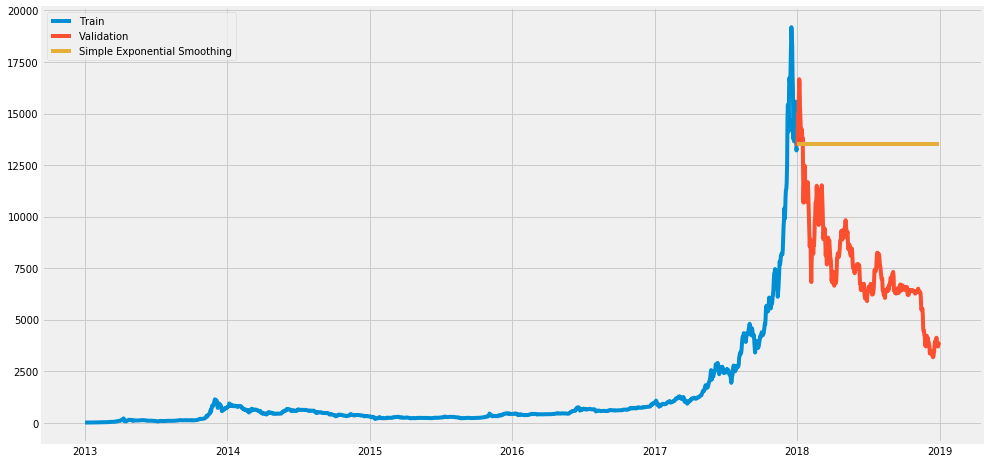

In [33]:
# Funcionou com IPCA
y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Close'])).fit(smoothing_level = 0.6, optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))#.rename(r'$\alpha=0.6$')
plt.figure(figsize =(15,8))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

***RMSE Error for Simple Exponential Smoothing***

In [34]:
rmse = sqrt(mean_squared_error(valid.Close, y_hat['SES']))
rmse

6447.130967108813

## Modelo de Tendêndia Linear de Holt
** Holt's Linear Trend Model**

In [35]:
Train.Close.head()

DateTime
2013-01-01    13.179153
2013-01-02    13.142528
2013-01-03    13.150208
2013-01-04    13.186528
2013-01-05    13.137569
Freq: D, Name: Close, dtype: float64

<Figure size 1600x800 with 0 Axes>

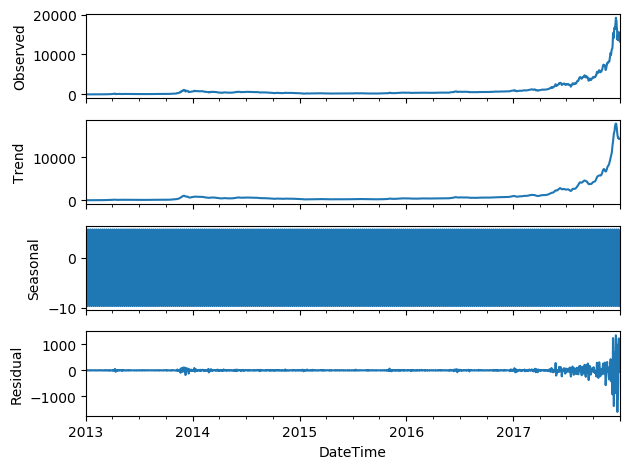

In [36]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Close).plot()
result = sm.tsa.stattools.adfuller(train.Close)
plt.show()

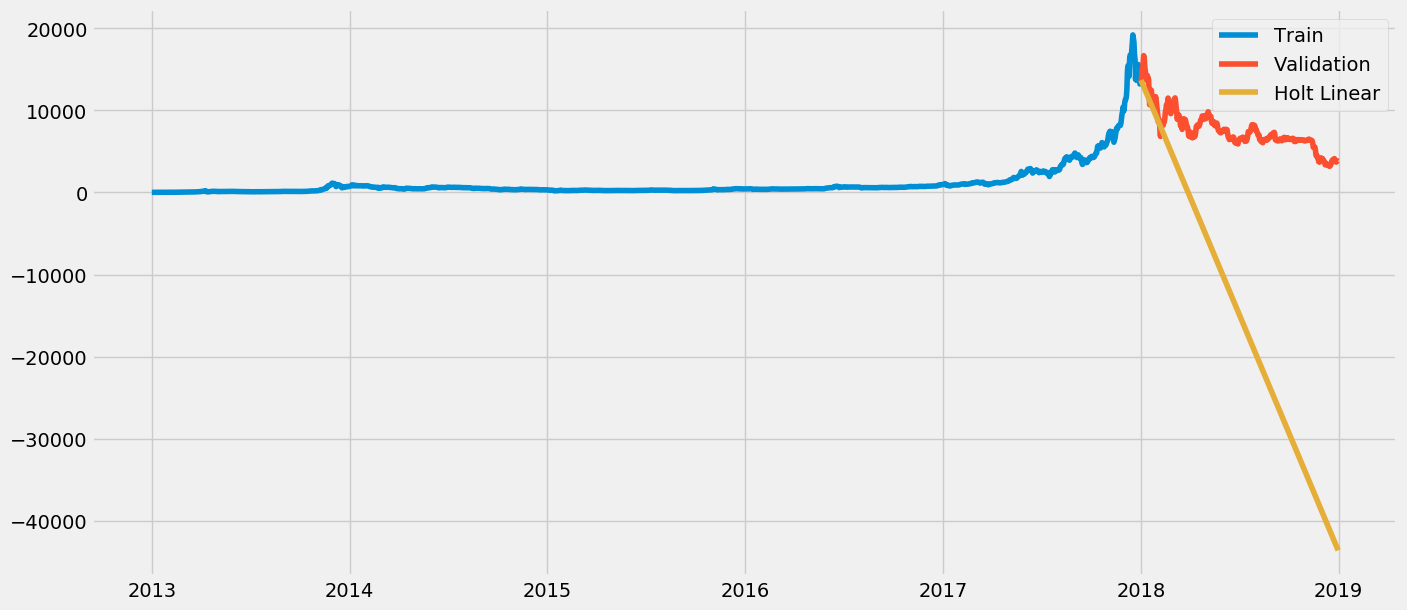

In [37]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Close'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
plt.plot(Train.Close, label = 'Train')
plt.plot(valid.Close, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [38]:
rmse = sqrt(mean_squared_error(valid.Close, y_hat_holt.Holt_linear))
rmse

26802.32544020615

*** Make Predictions on test set***

In [39]:
predict = fit1.forecast(len(test))
test['prediction'] = predict
test.head(3)

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close,prediction
DateTime,,,,,,,,,
2019-01-01,2019.0,1.0,1.0,1.0,1.0,11.5,2.0,3700.326597,13685.287596
2019-01-02,2019.0,2.0,1.0,2.0,1.0,11.5,3.0,3823.112729,13527.909372
2019-01-03,2019.0,3.0,1.0,3.0,1.0,11.5,4.0,3830.184972,13370.531149


**Holt Winter's Model**'

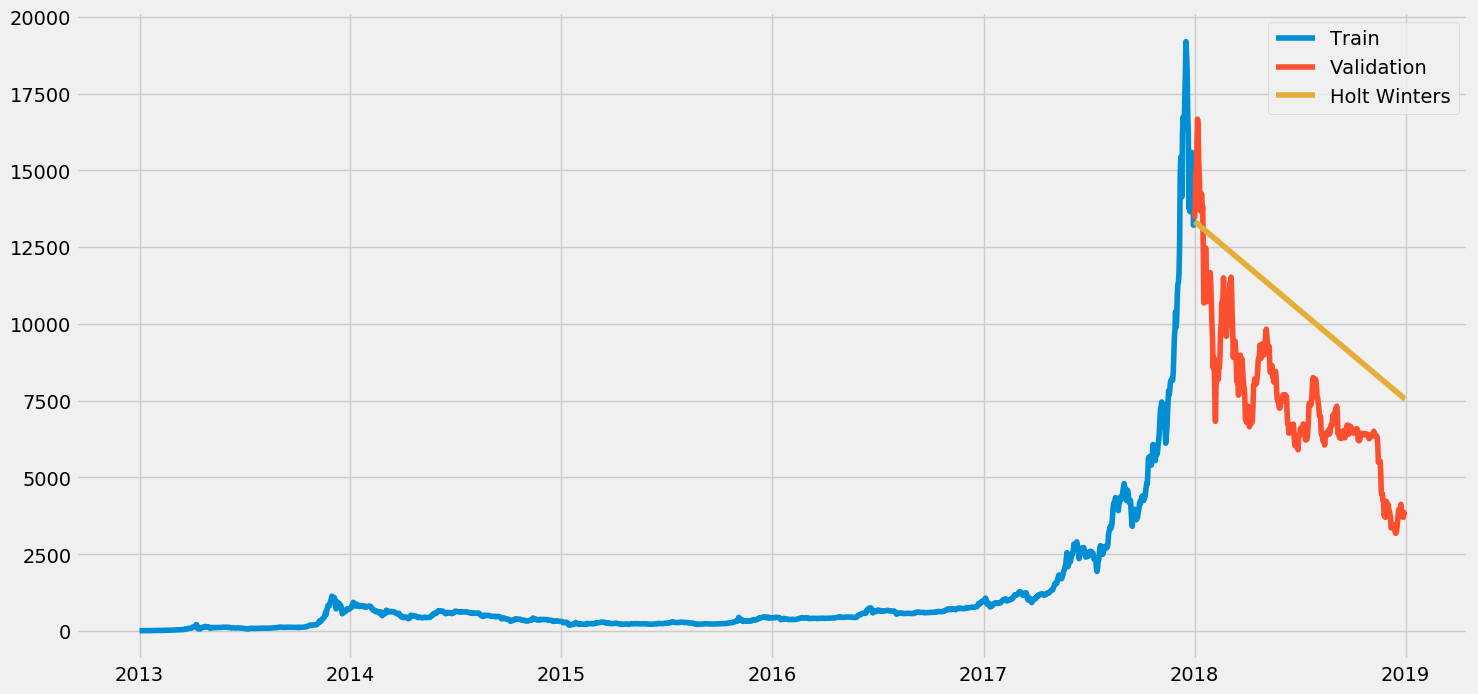

In [40]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Close']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Close'], label = 'Train')
plt.plot(valid['Close'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [41]:
rmse = sqrt(mean_squared_error(valid['Close'], y_hat_avg['Holt_Winter']))
rmse

3200.0516180033906

***Apply Holt Winter's on test data***

In [42]:
predict = fit1.forecast(len(test))
test['prediction'] = predict
test

,Ano,Dia_do_Ano,Mes,Dia_do_Mes,Semana_do_Ano,Hora_Dia,Dia_da_Semana,Close,prediction
DateTime,,,,,,,,,
2019-01-01,2019.0,1.0,1.0,1.0,1.0,11.5,2.0,3700.326597,13332.304679
2019-01-02,2019.0,2.0,1.0,2.0,1.0,11.5,3.0,3823.112729,13318.126091
2019-01-03,2019.0,3.0,1.0,3.0,1.0,11.5,4.0,3830.184972,13298.127612
2019-01-04,2019.0,4.0,1.0,4.0,1.0,11.5,5.0,3785.051049,13283.915116
2019-01-05,2019.0,5.0,1.0,5.0,1.0,11.5,6.0,3834.452139,13267.684360
2019-01-06,2019.0,6.0,1.0,6.0,1.0,11.5,7.0,3874.545215,13251.748514
2019-01-07,2019.0,7.0,1.0,7.0,2.0,11.5,1.0,4022.664299,13228.144815
2019-01-08,2019.0,8.0,1.0,8.0,2.0,11.5,2.0,4006.257035,13221.228299
2019-01-09,2019.0,9.0,1.0,9.0,2.0,11.5,3.0,4010.776396,13207.049712


**Remove Trend**

In [43]:
Train_log = np.log(Train['Close'])
valid_log = np.log(valid['Close'])

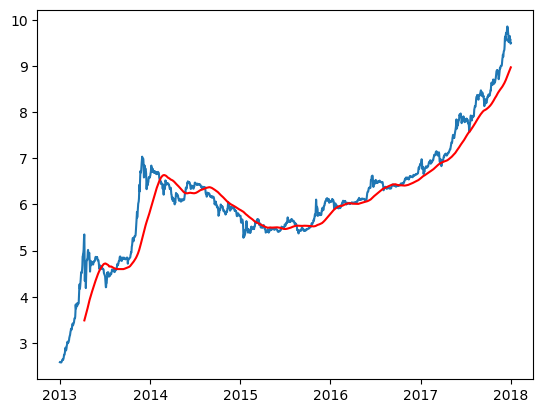

In [54]:
moving_avg = Train_log.rolling(100).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')


*** Removing Seasonailty***

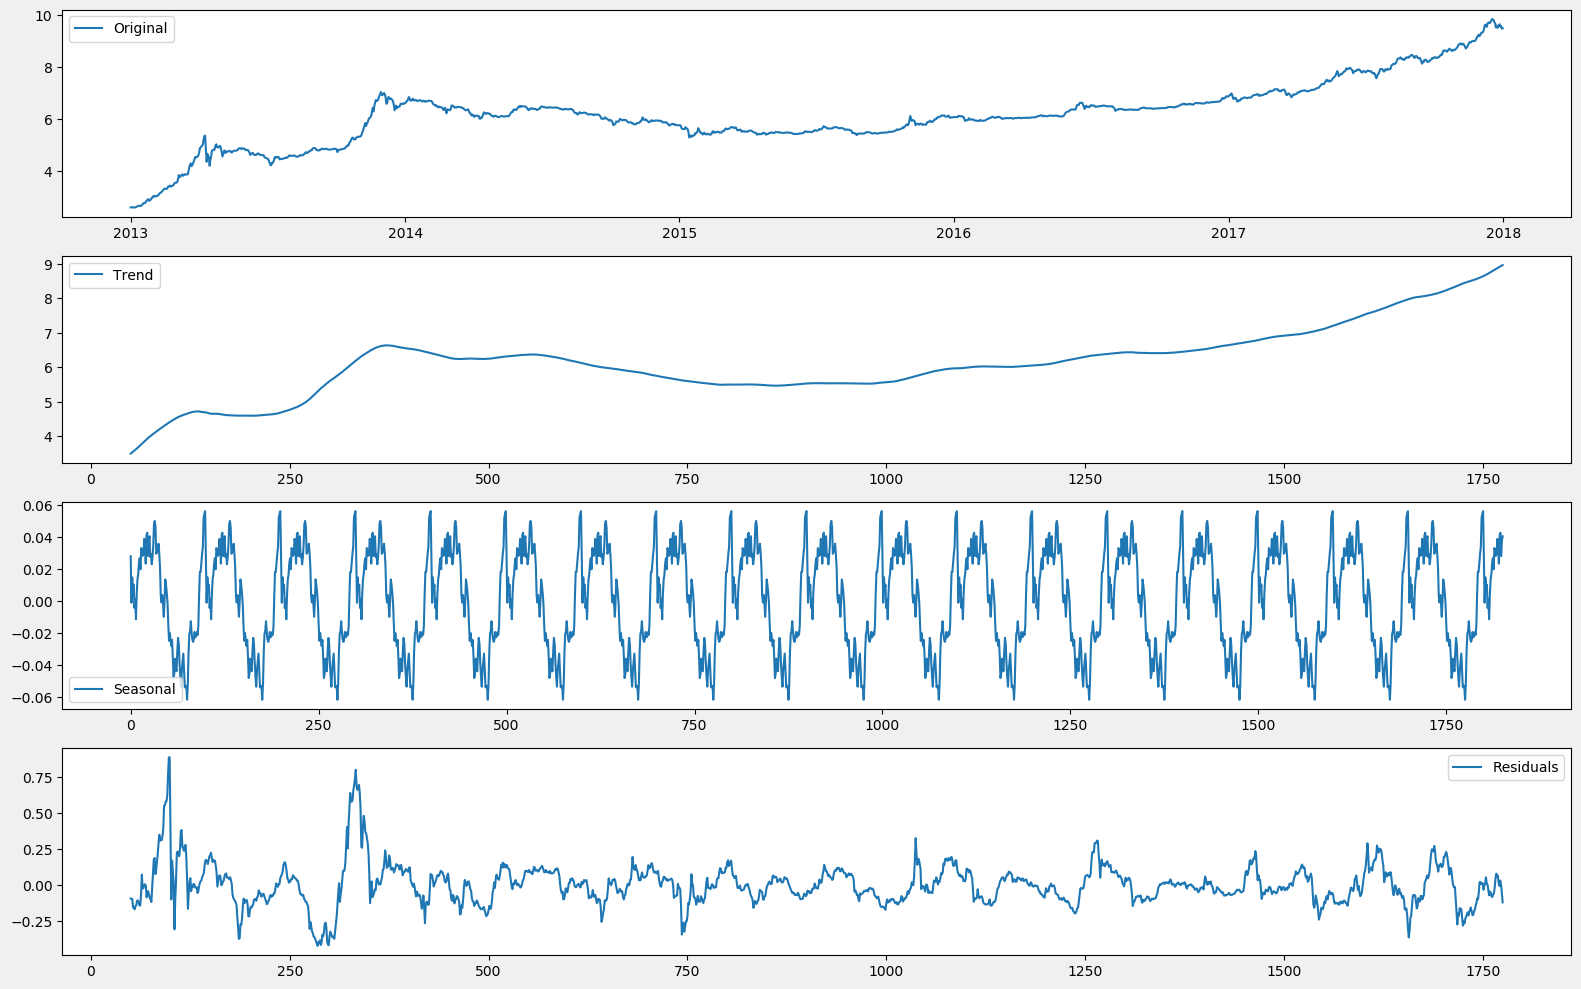

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Close.values, freq = 100)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


*** Let's check stationarity of residuals***

<Figure size 1600x800 with 0 Axes>

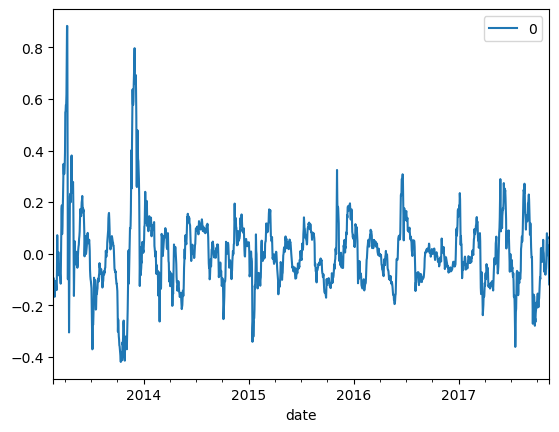

In [49]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
train_log_decompose.plot()

# ...........